# 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 2. Load and Preprocess the Dataset

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values (0-255) to (0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to fit the CNN input shape
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


# 3. Build the CNN Model

In [5]:
# Initialize the CNN
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Add a fully connected layer
model.add(Dense(128, activation='relu'))

# Add dropout to prevent overfitting
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(10, activation='softmax'))


C:\Users\keeru\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 3. Compile the Model

In [7]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


# 4. Train the Model

In [9]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=10, 
                    batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.8406 - loss: 0.5089 - val_accuracy: 0.9815 - val_loss: 0.0594
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9719 - loss: 0.0956 - val_accuracy: 0.9903 - val_loss: 0.0331
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 36ms/step - accuracy: 0.9803 - loss: 0.0667 - val_accuracy: 0.9874 - val_loss: 0.0364
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9839 - loss: 0.0517 - val_accuracy: 0.9886 - val_loss: 0.0325
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9869 - loss: 0.0442 - val_accuracy: 0.9917 - val_loss: 0.0247
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9916 - val_loss: 0.0245
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9900 - loss: 0.0320 - val_accuracy: 0.9923 - val_loss: 0.0257
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9919 - loss: 0.0275 - 

# 5. Model Evaluation using Accuracy

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9913 - loss: 0.0284
Test Accuracy: 99.36%


 # 6. Make Predictions and Visualize Results

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


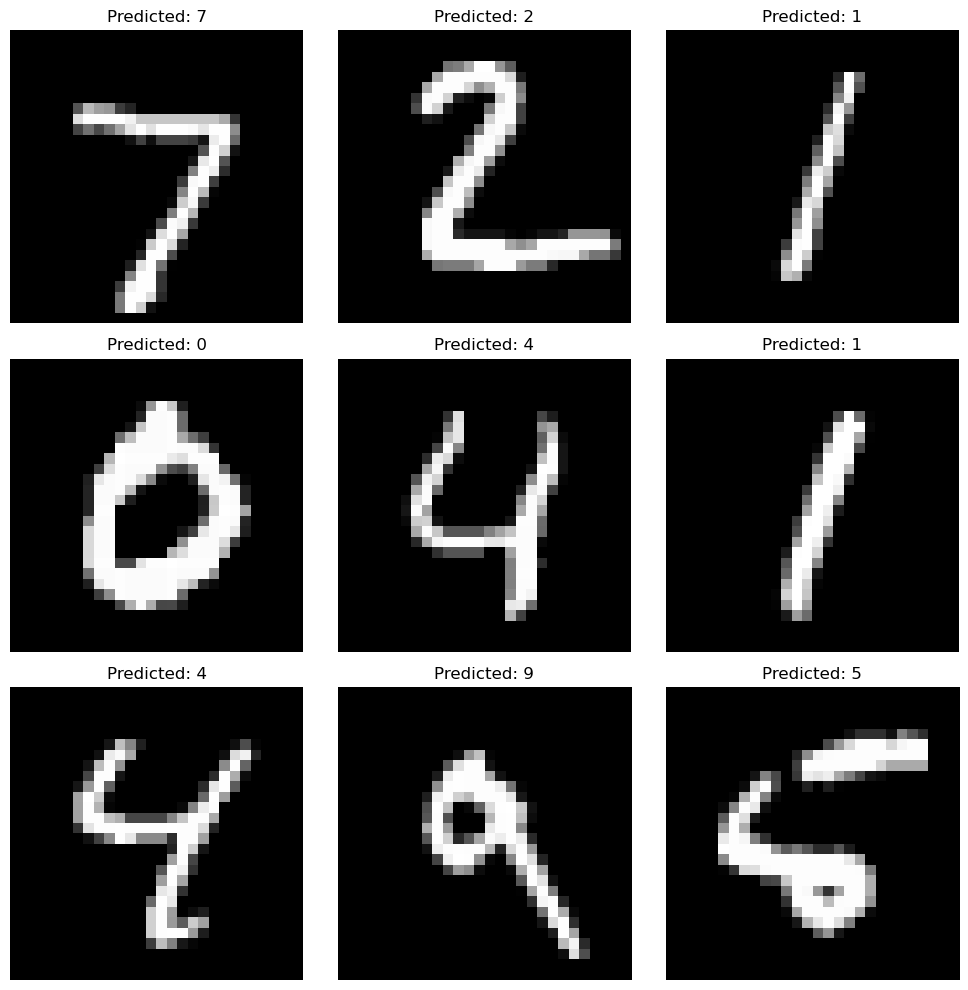

In [13]:
predictions = model.predict(x_test)

# Plot some test images with predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in np.arange(0, 9):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred = np.argmax(predictions[i])
    axes[i].set_title(f'Predicted: {pred}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 7. Save and Load the Model

In [15]:
# Save the model
model.save('digit_recognition_cnn.h5')


In [17]:
#for later use
from tensorflow.keras.models import load_model

# Load the model
model = load_model('digit_recognition_cnn.h5')


# 8. Make Predictions on custom input

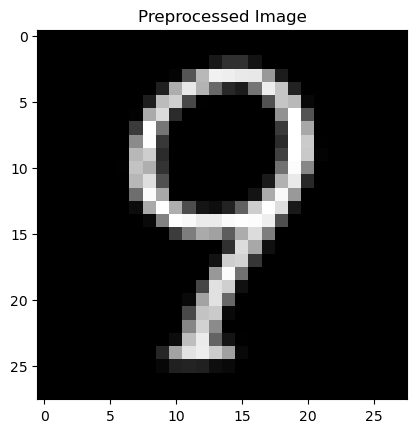

In [19]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image manually
image = Image.open('9.jpeg')

# Convert to grayscale
image = image.convert('L')

# Resize to 28x28
image = image.resize((28, 28))

# Convert to numpy array
image_array = np.array(image)

# Invert colors if background is white
image_array = 255 - image_array

# Normalize and reshape
image_array = image_array / 255.0
image_array = image_array.reshape(1, 28, 28, 1)

# Display the image
plt.imshow(image_array.reshape(28, 28), cmap='gray')
plt.title("Preprocessed Image")
plt.show()


In [21]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('digit_recognition_cnn.h5')

# Make predictions
prediction = model.predict(image_array)
predicted_digit = np.argmax(prediction)

print(f'Predicted Digit: {predicted_digit}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Predicted Digit: 9


In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [36]:
# Make predictions
y_pred = model.predict(x_test)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


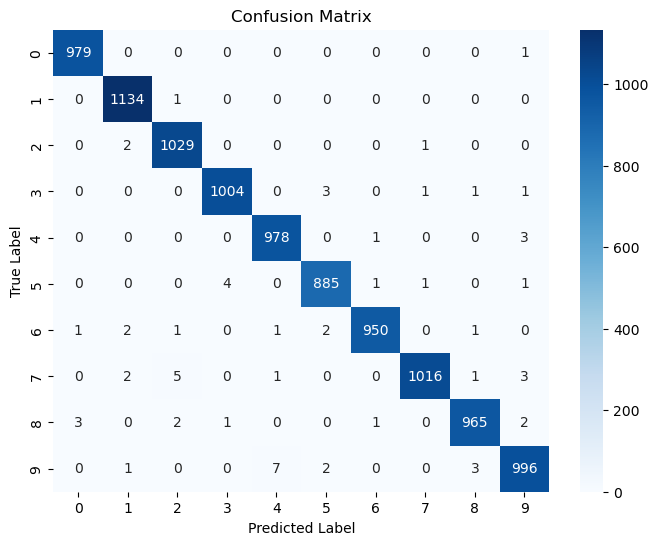

In [38]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [40]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [42]:
# Calculate Overall Metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")


Accuracy: 99.36%
Precision: 99.36%
Recall: 99.36%
F1-Score: 99.36%


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


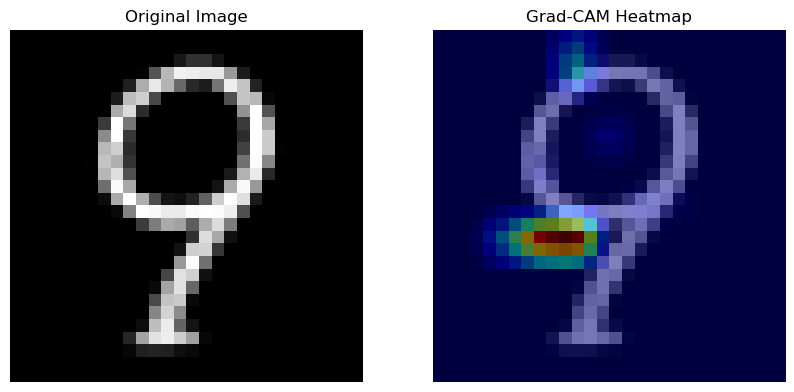

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils.scores import CategoricalScore

# Load the trained CNN model
model = load_model('digit_recognition_cnn.h5')

# Load the image
from PIL import Image

image = Image.open('9.jpeg')
image = image.convert('L')
image = image.resize((28, 28))
image_array = np.array(image)

# Invert and preprocess image
image_array = 255 - image_array
image_array = image_array / 255.0
image_array = image_array.reshape(1, 28, 28, 1)

# Grad-CAM Fix for Sequential Model
gradcam = Gradcam(model, model_modifier=lambda x: x)

# Get the class with the highest probability
score = CategoricalScore(np.argmax(model.predict(image_array)))

# Generate heatmap
heatmap = gradcam(score, image_array)

# Plot the heatmap
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_array.reshape(28, 28), cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(image_array.reshape(28, 28), cmap='gray')
ax[1].imshow(heatmap[0], alpha=0.5, cmap='jet')  # Blend heatmap with image
ax[1].set_title('Grad-CAM Heatmap')
ax[1].axis('off')

plt.show()
